<a href="https://colab.research.google.com/github/VARSHAMG23/ML-Algorithms/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('heart.csv')
df.shape

(303, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.duplicated().sum()

np.int64(1)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(302, 14)

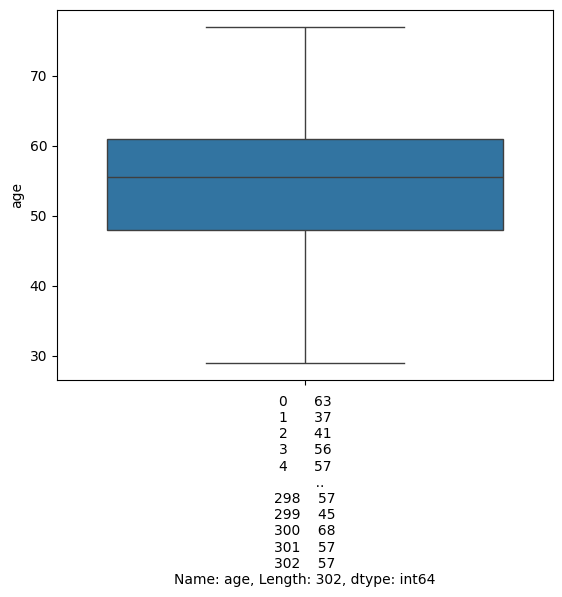

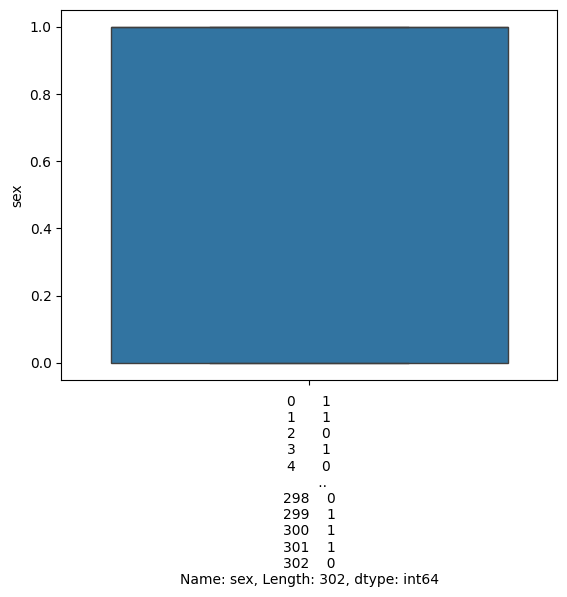

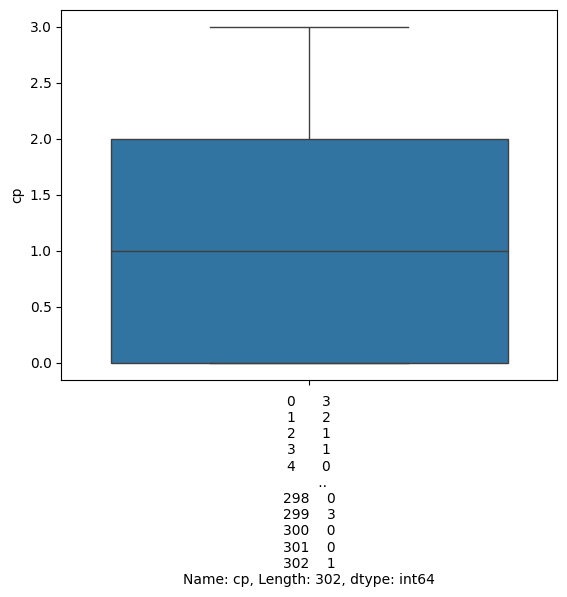

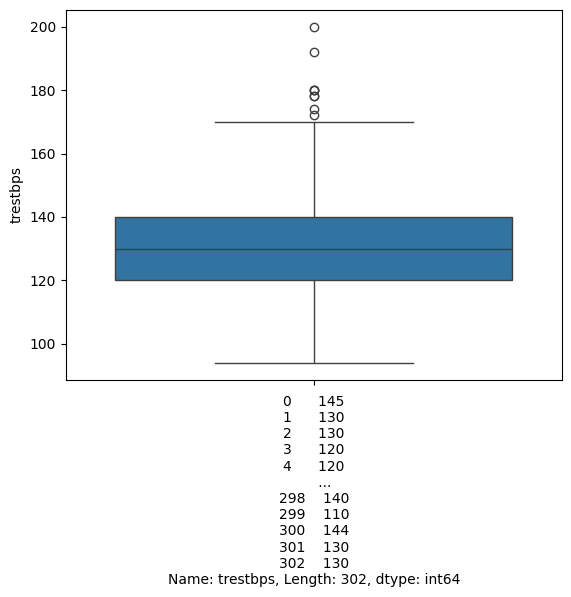

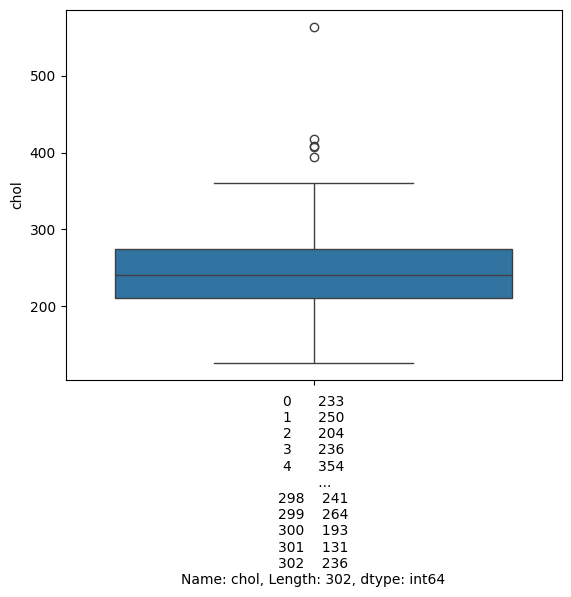

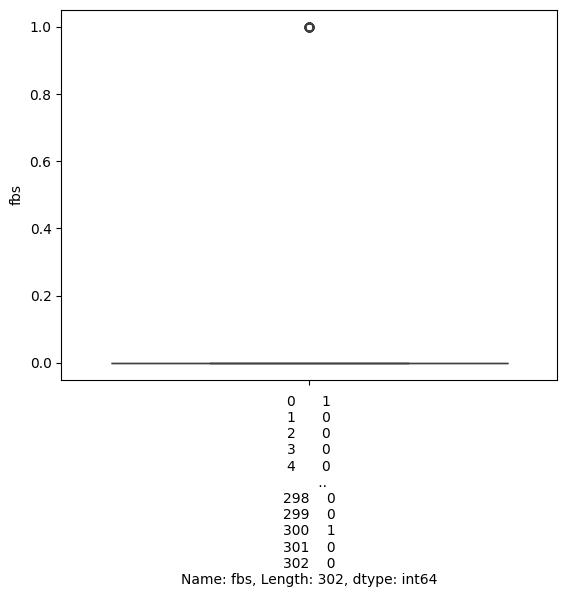

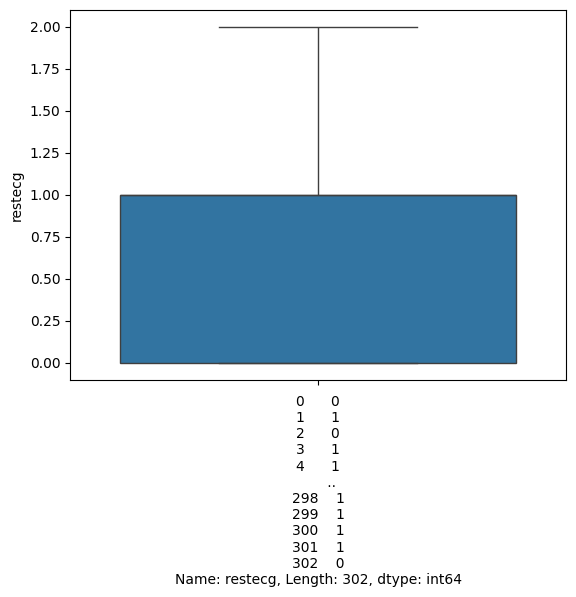

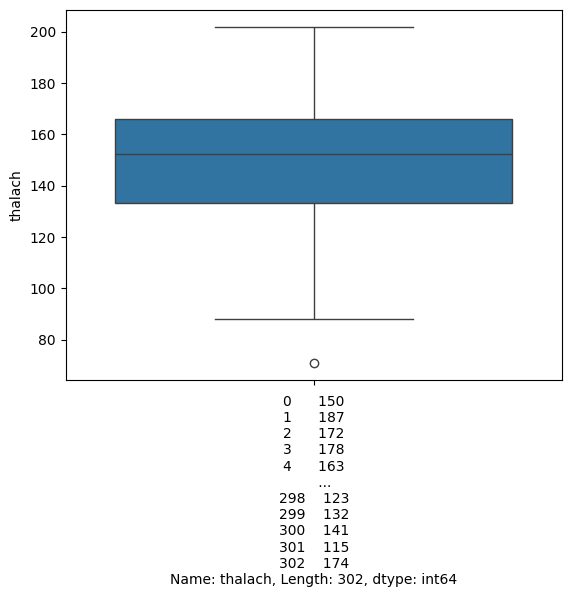

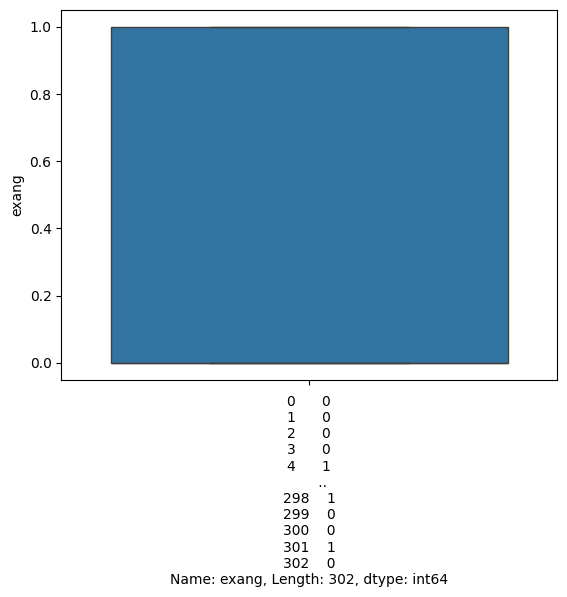

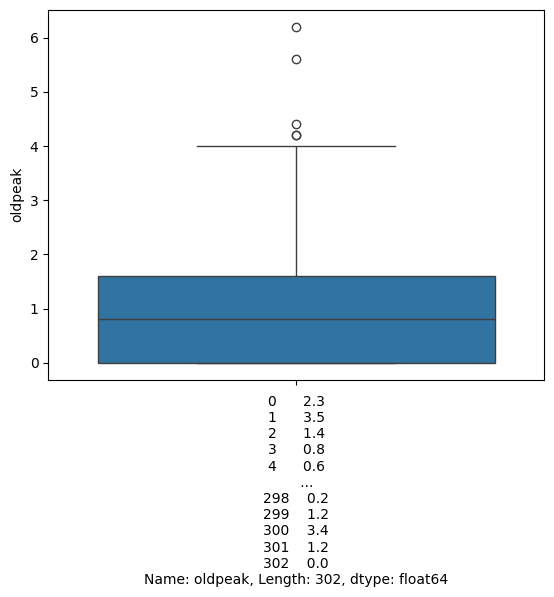

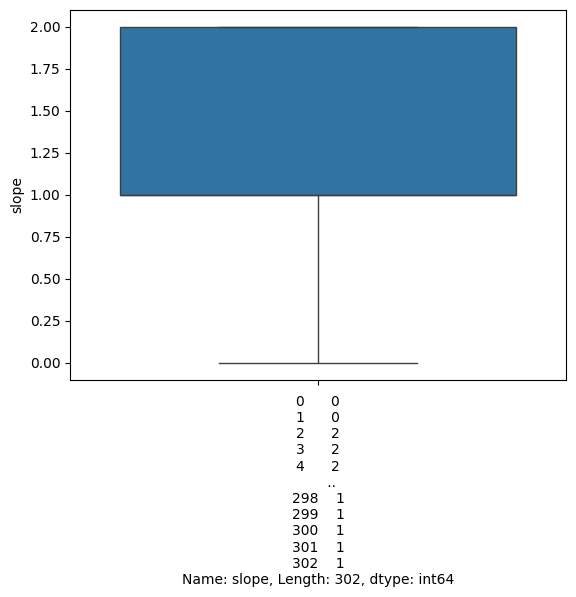

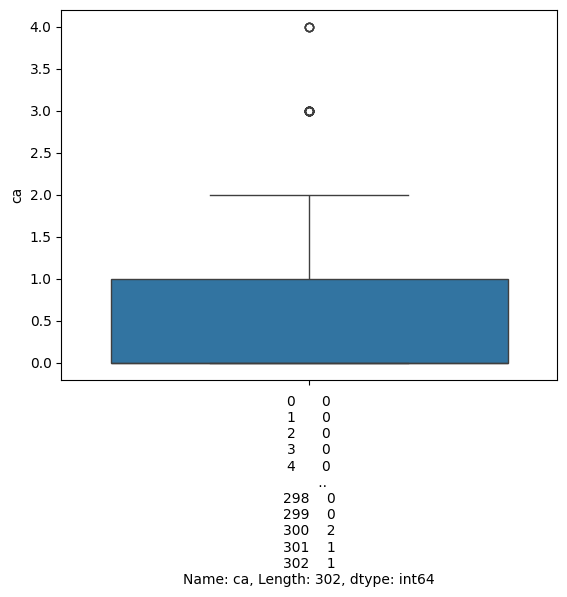

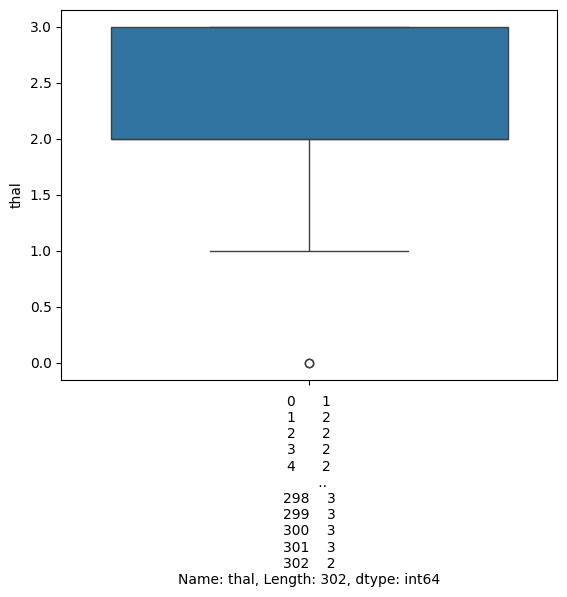

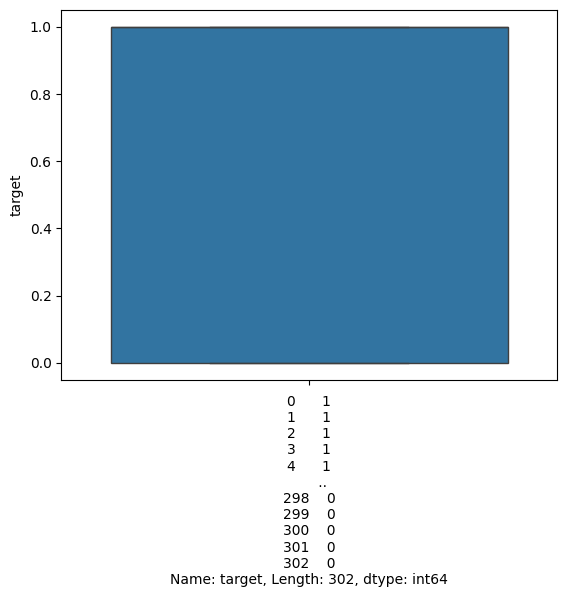

In [13]:
for col in df.columns:
  if df[col].dtype!='object':
    sns.boxplot(df[col])
    plt.xlabel(df[col])
    plt.show()

In [16]:
# x=df.iloc[:,:-1]
X=df.drop(columns='target')
y=df['target']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred=model.predict(X_test)

In [42]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
198,0,0
206,0,0
112,1,0
268,0,0
46,1,1
...,...,...
236,0,0
29,1,1
118,1,1
134,1,1


In [49]:
from sklearn.metrics import *

In [50]:
accuracy_score(y_pred,y_test)

0.8131868131868132

<Axes: >

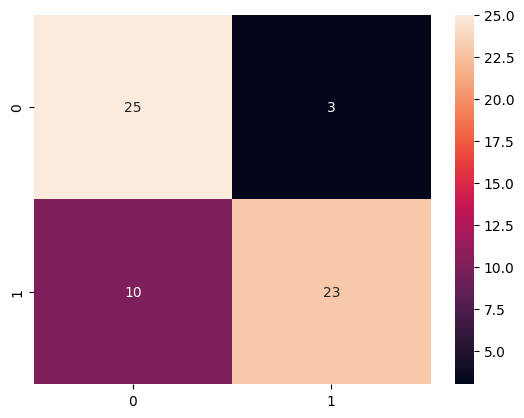

In [29]:
cf=confusion_matrix(y_pred,y_test)

sns.heatmap(cf,annot=True)

In [51]:
df.shape

(302, 14)

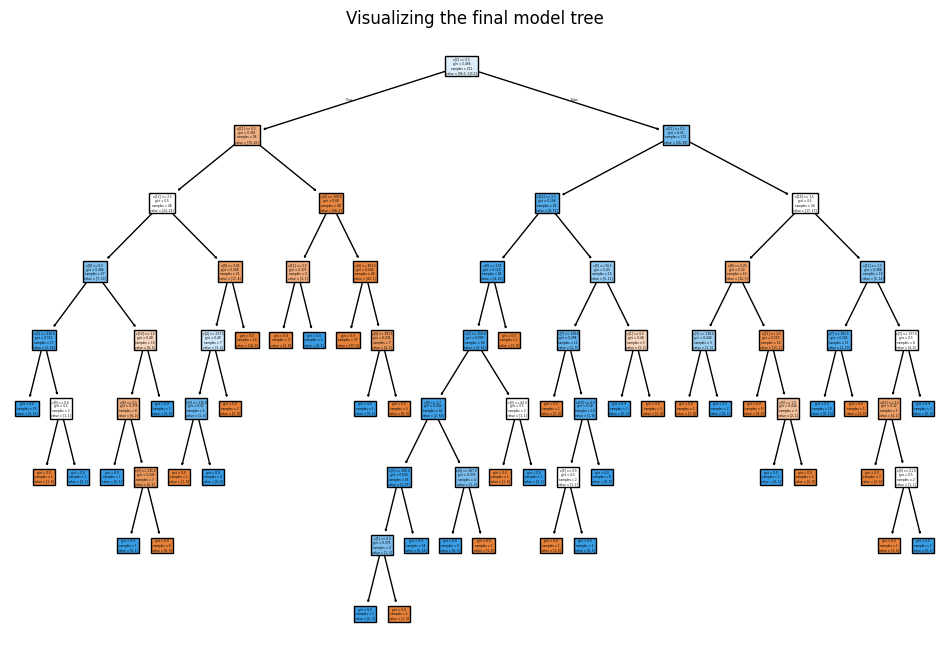

In [53]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(model,filled=True)
plt.title("Visualizing the final model tree")
plt.show()